In [2]:
#importing the packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
%matplotlib inline

In [3]:
#importing the data to df
df = pd.read_csv('hmeq.csv')

In [4]:
#printing the few rows of dataset 
print (df.head())

   BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO  DEBTINC  
0   94.366667   1.0   9.0      NaN  
1  121.833333   0.0  14.0      NaN  
2  149.466667   1.0  10.0      NaN  
3         NaN   NaN   NaN      NaN  
4   93.333333   0.0  14.0      NaN  


In [5]:
#checking the length
print(len(df))

5960


In [6]:
#imputing the the numerical columns with the null values
df.fillna(df.mean(), inplace=True)

In [7]:
#replacing the categorical column null values with the others
df.fillna('Others', inplace=True)

In [9]:
#using the laberl encoder to convert the categorical column i.e., reason to the numerical 
labelEncoder = preprocessing.LabelEncoder()
labelEncoder.fit(df['REASON'])
df['REASON'] = labelEncoder.transform(df['REASON'])

In [10]:
#using the laberl encoder to convert the categorical column i.e., job  to the numerical
labelEncoder.fit(df['JOB'])
df['JOB'] = labelEncoder.transform(df['JOB'])

In [11]:
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0000,39025.000000,1,2,10.500000,0.00000,0.000000,94.366667,1.000000,9.000000,33.779915
1,1,1300,70053.0000,68400.000000,1,2,7.000000,0.00000,2.000000,121.833333,0.000000,14.000000,33.779915
2,1,1500,13500.0000,16700.000000,1,2,4.000000,0.00000,0.000000,149.466667,1.000000,10.000000,33.779915
3,1,1500,73760.8172,101776.048741,2,3,8.922268,0.25457,0.449442,179.766275,1.186055,21.296096,33.779915
4,0,1700,97800.0000,112000.000000,1,1,3.000000,0.00000,0.000000,93.333333,0.000000,14.000000,33.779915
5,1,1700,30548.0000,40320.000000,1,2,9.000000,0.00000,0.000000,101.466002,1.000000,8.000000,37.113614
6,1,1800,48649.0000,57037.000000,1,2,5.000000,3.00000,2.000000,77.100000,1.000000,17.000000,33.779915
7,1,1800,28502.0000,43034.000000,1,2,11.000000,0.00000,0.000000,88.766030,0.000000,8.000000,36.884894
8,1,2000,32700.0000,46740.000000,1,2,3.000000,0.00000,2.000000,216.933333,1.000000,12.000000,33.779915
9,1,2000,73760.8172,62250.000000,1,5,16.000000,0.00000,0.000000,115.800000,0.000000,13.000000,33.779915


In [13]:
#building the kmeans model
mat = df.values
# Using sklearn
km = KMeans(n_clusters=4)
km.fit(mat)
# Get cluster assignment labels
labels = km.labels_

In [14]:
# Format results as a DataFrame
results = pd.DataFrame([df.index,labels]).T
results

,0,1
0,0,0
1,1,0
2,2,0
3,3,2
4,4,2
5,5,0
6,6,0
7,7,0
8,8,0
9,9,0


In [15]:
#checking the mat which is in array format
mat

array([[1.00000000e+00, 1.10000000e+03, 2.58600000e+04, ...,
        1.00000000e+00, 9.00000000e+00, 3.37799153e+01],
       [1.00000000e+00, 1.30000000e+03, 7.00530000e+04, ...,
        0.00000000e+00, 1.40000000e+01, 3.37799153e+01],
       [1.00000000e+00, 1.50000000e+03, 1.35000000e+04, ...,
        1.00000000e+00, 1.00000000e+01, 3.37799153e+01],
       ...,
       [0.00000000e+00, 8.92000000e+04, 5.40450000e+04, ...,
        0.00000000e+00, 1.50000000e+01, 3.55565905e+01],
       [0.00000000e+00, 8.98000000e+04, 5.03700000e+04, ...,
        0.00000000e+00, 1.60000000e+01, 3.43408824e+01],
       [0.00000000e+00, 8.99000000e+04, 4.88110000e+04, ...,
        0.00000000e+00, 1.60000000e+01, 3.45715191e+01]])

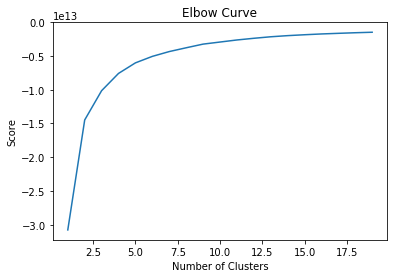

In [16]:
# plotting the elbow curve
Nc = range(1, 20)

kmeans = [KMeans(n_clusters=i) for i in Nc]

kmeans
score = [kmeans[i].fit(mat).score(mat) for i in range(len(kmeans))]

score

plt.plot(Nc,score)

plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve')

plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler
features =list(df)
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = list(labels)
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [18]:
#doing the principal component 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [19]:
#concatinating
finalDf = pd.concat([principalDf,results[1]],axis=1)

In [20]:
#checking the principal component
finalDf

,principal component 1,principal component 2,1
0,-2.682542,0.564440,0
1,-1.564911,1.269645,0
2,-2.891326,0.571389,0
3,-0.754682,0.753011,2
4,-0.785800,-0.617301,2
5,-2.545147,0.680354,0
6,-2.172665,3.327929,0
7,-2.585844,0.426567,0
8,-2.062145,1.262667,0
9,-1.166321,0.123204,0


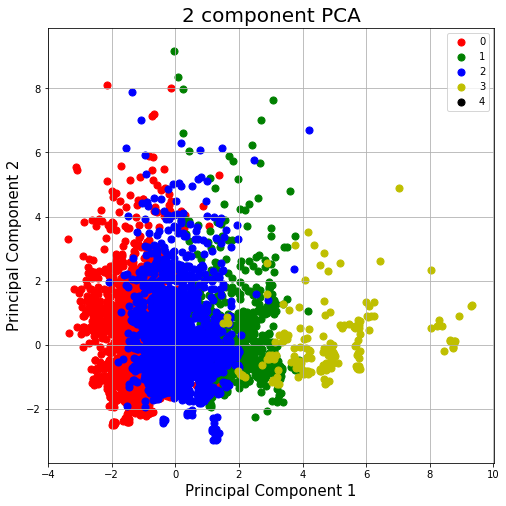

In [21]:
#plotting the principal component
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1,2,3,4]
colors = ['r', 'g', 'b','y','black']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf[1] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()